In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import MonthEnd

In [2]:
def conf_int_corr(df, n=1000, alpha=5):
    a = np.empty(((n, df.shape[1], df.shape[1])))
    for i in range(n):
        a[i] = df.sample(frac = 1, replace = True).corr()
    upper = np.percentile(a, 100-alpha/2, axis = 0)
    lower = np.percentile(a, alpha/2, axis = 0)
    conf = [[0 for i in range(df.shape[1])] for i in range(df.shape[1])]
    for i in range(upper.shape[0]):
        for j in range(upper.shape[1]):
            conf[i][j] = (round(lower[i,j],2), round(upper[i,j],2))
    return pd.DataFrame(conf, index = df.columns, columns = df.columns)

In [3]:
#load cpi data
cpi_df = pd.read_excel('CPI data.xls', skiprows = 14)
cpi_df.index = cpi_df['observation_date'] + MonthEnd(0) #let observation date reflect that it is end-of-month observation
cpi_df = cpi_df.drop('observation_date',axis = 1)
cpi_df

,CPIAUCSL,NORCPIALLMINMEI,SWECPIALLMINMEI,GBRCPIALLMINMEI,DEUCPIALLMINMEI
observation_date,,,,,
1947-01-31,21.480,NaN,NaN,NaN,NaN
1947-02-28,21.620,NaN,NaN,NaN,NaN
1947-03-31,22.000,NaN,NaN,NaN,NaN
1947-04-30,22.000,NaN,NaN,NaN,NaN
1947-05-31,21.950,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-09-30,296.539,125.6,122.296185,122.3,121.120187
2022-10-31,297.987,126.0,122.561068,124.3,122.220370
2022-11-30,298.598,125.8,123.802508,124.8,121.620270


In [4]:
#load exchange rate data
fx_df = pd.read_excel('exchange-rate data.xls', skiprows = 14)
fx_df.index = fx_df['observation_date']+ MonthEnd(0) #let observation date reflect that it is end-of-month observation
fx_df = fx_df.drop('observation_date',axis = 1)
fx_df['USD_EUR'] = 1.95583/fx_df['EXGEUS'] #convert DEM/USD to USD/EUR
fx_df['USD_EUR'] = fx_df['USD_EUR'].fillna(fx_df['DEXUSEU']) # fill NaN with DEXUSEU

<AxesSubplot:xlabel='observation_date'>

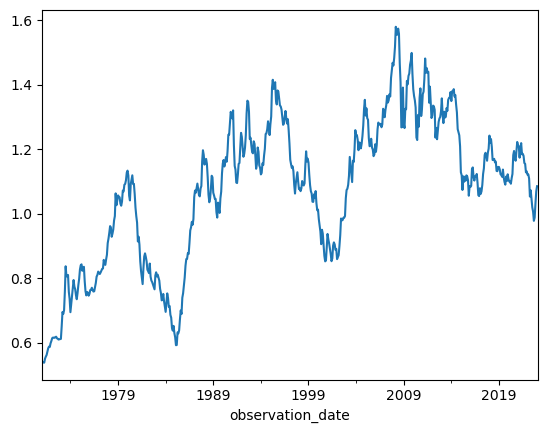

In [5]:
fx_df['USD_EUR'].plot()

In [6]:
#load S&P500 data
sp500_df = pd.read_excel('S&P 500 Total return 1970.xlsx', sheet_name = 'Monthly').dropna()
sp500_df.columns = ['Date', 'date_real', 'S&P500']
sp500_df.index = sp500_df['Date']+ MonthEnd(0) #let observation date reflect that it is end-of-month observation
sp500_df = sp500_df.drop(['Date','date_real'],axis = 1)

In [7]:
#load LEGATRUU (bonds)
leg = pd.read_csv('LEGATRUU.csv', delimiter = ';', decimal = ',')
leg = leg[['Date', 'TotRetIndex']].dropna()
leg.index = pd.to_datetime(leg['Date'], format = "%d/%m/%Y")
leg = leg.asfreq('M', method = 'ffill')
leg

,Date,TotRetIndex
Date,,
1990-04-30,30/04/1990,97.1139
1990-05-31,31/05/1990,100.1953
1990-06-30,29/06/1990,102.0496
1990-07-31,31/07/1990,104.7318
1990-08-31,31/08/1990,103.6773
...,...,...
2020-05-31,29/05/2020,522.2931
2020-06-30,30/06/2020,526.9333
2020-07-31,31/07/2020,543.7390


In [8]:
#load MXWO (stocks)
mxwo = pd.read_csv('MXWO.csv', delimiter = ';', decimal = ',')
mxwo = mxwo[['Date', 'TotRetIndex']].dropna()
mxwo.index = pd.to_datetime(mxwo['Date'], format = "%d/%m/%Y")
mxwo = mxwo.asfreq('M', method = 'ffill')
mxwo

,Date,TotRetIndex
Date,,
1990-04-30,30/04/1990,475.9200
1990-05-31,31/05/1990,525.1000
1990-06-30,29/06/1990,520.4100
1990-07-31,31/07/1990,524.1800
1990-08-31,31/08/1990,474.1300
...,...,...
2020-05-31,29/05/2020,3876.0149
2020-06-30,30/06/2020,3980.3664
2020-07-31,31/07/2020,4172.2651


In [9]:
#join datasets
df = (sp500_df
      .join(fx_df)
      .join(cpi_df))
df['Stocks'] = mxwo['TotRetIndex']
df['Bonds'] = leg['TotRetIndex']
df

,S&P500,DEXNOUS,DEXSDUS,DEXUSUK,EXGEUS,DEXUSEU,USD_EUR,CPIAUCSL,NORCPIALLMINMEI,SWECPIALLMINMEI,GBRCPIALLMINMEI,DEUCPIALLMINMEI,Stocks,Bonds
Date,,,,,,,,,,,,,,
1971-01-31,99.82,7.1445,5.1675,2.4174,3.6370,NaN,0.537759,39.900,13.402550,14.010344,8.820129,30.466088,NaN,NaN
1971-02-28,100.98,7.1420,5.1652,2.4160,3.6313,NaN,0.538603,39.900,13.402550,14.025433,8.868130,30.727039,NaN,NaN
1971-03-31,104.96,7.1314,5.1624,2.4168,3.6313,NaN,0.538603,40.000,13.474221,14.060641,8.940131,30.857515,NaN,NaN
1971-04-30,109.04,7.1312,5.1614,2.4193,3.6343,NaN,0.538159,40.100,13.474221,14.032140,9.132133,31.053229,NaN,NaN
1971-05-31,104.78,7.1115,5.1648,2.4178,3.5535,NaN,0.550395,40.300,13.545892,13.984637,9.192134,31.118467,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,16451.00,10.8719,11.1250,1.1134,NaN,0.9783,0.978300,296.539,125.600000,122.296185,122.300000,121.120187,NaN,NaN
2022-10-31,17782.90,10.3954,11.0462,1.1515,NaN,0.9885,0.988500,297.987,126.000000,122.561068,124.300000,122.220370,NaN,NaN
2022-11-30,18776.68,9.9400,10.6181,1.1962,NaN,1.0323,1.032300,298.598,125.800000,123.802508,124.800000,121.620270,NaN,NaN


In [10]:
#calculate S&P total return index in FX
df['Real_USD'] = 1/df['CPIAUCSL']
df['Real_NOK'] = df['DEXNOUS']/df['NORCPIALLMINMEI']
df['Real_SEK'] = df['DEXSDUS']/df['SWECPIALLMINMEI']
df['Real_GBP'] = (1/df['DEXUSUK'])/df['GBRCPIALLMINMEI']
df['Real_EUR'] = (1/df['USD_EUR'])/df['DEUCPIALLMINMEI']



currencies = ['USD', 'NOK', 'SEK', 'GBP', 'EUR']
#for currency in currencies:
#    df[f'Real_S&P_{currency}'] = df[f'Real_{currency}']*df['S&P500']
#    df[f'Real_Stocks_{currency}'] = df[f'Real_{currency}']*df['Stocks']
#    df[f'Real_Bonds_{currency}'] = df[f'Real_{currency}']*df['Bonds']

In [11]:
log_ret = np.log(df)-np.log(df.shift())

In [12]:
for currency in currencies:
    log_ret[f'Real_S&P_{currency}'] = log_ret[f'Real_{currency}']+log_ret['S&P500']
    log_ret[f'Real_Stocks_{currency}'] = log_ret[f'Real_{currency}']+log_ret['Stocks']
    log_ret[f'Real_Bonds_{currency}'] = log_ret[f'Real_{currency}']+log_ret['Bonds']
    log_ret[f'Real_7030_{currency}'] = log_ret[f'Real_{currency}']+.7*log_ret['Stocks'] + .3*log_ret['Bonds']
    log_ret[f'Real_6040_{currency}'] = log_ret[f'Real_{currency}']+.6*log_ret['Stocks'] + .4*log_ret['Bonds']
    log_ret[f'Real_5050_{currency}'] = log_ret[f'Real_{currency}']+.5*log_ret['Stocks'] + .5*log_ret['Bonds']

In [13]:
log_return_df = log_ret.filter(regex = 'Real_.*_').loc['1993':'2020-09']
log_return_df

,Real_S&P_USD,Real_Stocks_USD,Real_Bonds_USD,Real_7030_USD,Real_6040_USD,Real_5050_USD,Real_S&P_NOK,Real_Stocks_NOK,Real_Bonds_NOK,Real_7030_NOK,...,Real_Bonds_GBP,Real_7030_GBP,Real_6040_GBP,Real_5050_GBP,Real_S&P_EUR,Real_Stocks_EUR,Real_Bonds_EUR,Real_7030_EUR,Real_6040_EUR,Real_5050_EUR
Date,,,,,,,,,,,,,,,,,,,,,
1993-01-31,0.004820,-0.002100,0.013510,0.002583,0.004144,0.005705,-0.010103,-0.017023,-0.001413,-0.012340,...,0.038560,0.027633,0.029194,0.030755,0.011176,0.004255,0.019865,0.008938,0.010499,0.012060
1993-02-28,0.011439,0.019442,0.013569,0.017680,0.017093,0.016506,0.032818,0.040820,0.034948,0.039059,...,0.054910,0.059022,0.058434,0.057847,0.022240,0.030243,0.024370,0.028481,0.027893,0.027306
1993-03-31,0.019478,0.053174,0.009394,0.040040,0.035662,0.031284,-0.009805,0.023891,-0.019889,0.010757,...,-0.053717,-0.023071,-0.027449,-0.031827,0.021423,0.055120,0.011339,0.041986,0.037608,0.033229
1993-04-30,-0.027947,0.040081,0.010751,0.031282,0.028349,0.025416,-0.044350,0.023679,-0.005651,0.014880,...,-0.031405,-0.010874,-0.013807,-0.016740,-0.058033,0.009995,-0.019335,0.001196,-0.001737,-0.004670
1993-05-31,0.023623,0.018295,0.004005,0.014008,0.012579,0.011150,0.028852,0.023524,0.009233,0.019237,...,0.009384,0.019387,0.017958,0.016529,0.031780,0.026452,0.012162,0.022165,0.020736,0.019307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31,0.047404,0.048653,0.005252,0.035633,0.031293,0.026953,-0.007779,-0.006530,-0.049931,-0.019550,...,0.027009,0.057389,0.053049,0.048709,0.031773,0.033022,-0.010378,0.020002,0.015662,0.011322
2020-06-30,0.015333,0.022206,0.004485,0.016890,0.015118,0.013346,0.010387,0.017261,-0.000461,0.011944,...,0.003036,0.015441,0.013669,0.011896,0.002412,0.009286,-0.008436,0.003969,0.002197,0.000425
2020-07-31,0.049838,0.042070,0.026380,0.037363,0.035794,0.034225,-0.012960,-0.020728,-0.036417,-0.025435,...,-0.032209,-0.021226,-0.022795,-0.024364,0.008804,0.001036,-0.014653,-0.003671,-0.005240,-0.006809


In [27]:
#bootstrap
n = 1000 #number of samples drawn

log_return = log_return_df #get subsample

tables = {col: pd.DataFrame(index = np.arange(1,11)) for col in log_return} #create one table for each currency
for n_years in range(1,11):
    bootstrap_samples = pd.DataFrame(index = np.arange(n), columns = log_return.columns) #create dataframe to store samples

    start_index = np.random.randint(0,len(log_return)-12*n_years, n) #random start indices
    for i in range(n):
        bootstrap_samples.iloc[i] = log_return.iloc[start_index[i]:start_index[i]+12*(n_years)].sum() #store n_year log-return from random start date
    for col in tables:
        tables[col].loc[n_years, 'Mean (%)'] = bootstrap_samples[col].mean()*100
        tables[col].loc[n_years, 'Variance (%)'] = bootstrap_samples[col].var()*100
        tables[col].loc[n_years, 'Variance ratio'] = (tables[col].loc[n_years,'Variance (%)']/n_years)/tables[col].loc[1,'Variance (%)']
        tables[col].loc[n_years, 'Standard deviation (%)'] = bootstrap_samples[col].std()*100
        tables[col].loc[n_years, 'Coefficient of variation'] = (tables[col].loc[n_years,'Standard deviation (%)'])/tables[col].loc[n_years,'Mean (%)']

In [28]:
tables['Real_S&P_NOK']

,Mean (%),Variance (%),Variance ratio,Standard deviation (%),Coefficient of variation
1,8.076572,3.236867,1.000000,17.991295,2.227591
2,16.423932,9.849979,1.521530,31.384677,1.910911
3,24.623271,16.739293,1.723816,40.913681,1.661586
4,33.095907,24.167737,1.866599,49.160692,1.485401
5,36.835472,30.553549,1.887847,55.275265,1.500599
6,43.863536,33.865206,1.743723,58.193819,1.326702
7,45.031018,35.952814,1.586755,59.960665,1.331541
8,45.729496,36.620893,1.414211,60.515199,1.323330
9,45.640941,38.114790,1.308357,61.737177,1.352671
10,47.768691,38.147405,1.178529,61.763586,1.292972


In [29]:
# Create a Pandas Excel writer
writer = pd.ExcelWriter('mukherji_tabeller_nye_porteføljer.xlsx')

# Write each dataframe to a different worksheet.
for col in tables:
    tables[col].to_excel(writer, sheet_name=col)
# Close the Pandas Excel writer and output the Excel file.
writer.close()

## Correlations

In [51]:
#FX data
data = pd.DataFrame()
data['S&P500'] = df['S&P500']
data['Stocks'] = df['Stocks']
data['Bonds'] = df['Bonds']
data['NOK'] = df['DEXNOUS']
data['SEK'] = df['DEXSDUS']
data['GBP'] =1/df['DEXUSUK']
data['EUR'] = 1/df['USD_EUR']

In [52]:
ret = np.log(data)-np.log(data.shift())
ret = ret['1993':'2020-09']
ret['7030'] = .7*ret['Stocks'] + .3*ret['Bonds']
ret['6040'] = .6*ret['Stocks'] + .4*ret['Bonds']
ret['5050'] = .5*ret['Stocks'] + .5*ret['Bonds']
yearly_ret = ret.resample('Y').sum()[:'2019']

In [53]:
with pd.ExcelWriter('corr v2.xlsx') as writer:
    ret.corr().to_excel(writer, sheet_name = 'monthly_point_corr')
    conf_int_corr(ret,10_000).to_excel(writer, sheet_name = 'monthly_90_conf_int_corr')
    ret.cov().to_excel(writer, sheet_name = 'monthly_covariance')
    ret.std().to_excel(writer, sheet_name = 'monthly_std_deviation')
    
    yearly_ret.corr().to_excel(writer, sheet_name = 'yearly_point_corr')
    conf_int_corr(yearly_ret,10_000).to_excel(writer, sheet_name = 'yearly_90_conf_int_corr')
    yearly_ret.cov().to_excel(writer, sheet_name = 'yearly_covariance')
    yearly_ret.std().to_excel(writer, sheet_name = 'yearly_std_deviation')

In [44]:
ret.cov()

,S&P500,Stocks,Bonds,NOK,SEK,GBP,EUR,7030,6040,5050
S&P500,0.001814,0.001747,0.000111,-0.000435,-0.000466,-0.000249,-0.000266,0.001256,0.001093,0.000929
Stocks,0.001747,0.001863,0.000170,-0.000589,-0.000628,-0.000371,-0.000391,0.001355,0.001186,0.001017
Bonds,0.000111,0.000170,0.000227,-0.000271,-0.000282,-0.000158,-0.000273,0.000187,0.000193,0.000198
NOK,-0.000435,-0.000589,-0.000271,0.000964,0.000771,0.000439,0.000589,-0.000494,-0.000462,-0.000430
SEK,-0.000466,-0.000628,-0.000282,0.000771,0.000962,0.000456,0.000624,-0.000525,-0.000490,-0.000455
GBP,-0.000249,-0.000371,-0.000158,0.000439,0.000456,0.000601,0.000369,-0.000307,-0.000286,-0.000264
EUR,-0.000266,-0.000391,-0.000273,0.000589,0.000624,0.000369,0.000693,-0.000356,-0.000344,-0.000332
7030,0.001256,0.001355,0.000187,-0.000494,-0.000525,-0.000307,-0.000356,0.001005,0.000888,0.000771
6040,0.001093,0.001186,0.000193,-0.000462,-0.000490,-0.000286,-0.000344,0.000888,0.000789,0.000689
5050,0.000929,0.001017,0.000198,-0.000430,-0.000455,-0.000264,-0.000332,0.000771,0.000689,0.000608


In [45]:
ret.std()

S&P500    0.042589
Stocks    0.043167
Bonds     0.015067
NOK       0.031051
SEK       0.031011
GBP       0.024509
EUR       0.026316
7030      0.031700
6040      0.028084
5050      0.024649
dtype: float64

In [49]:
log_return_df.to_excel('mukherji_grunnlag.xlsx')

In [50]:
ret.to_excel('corr_grunnlag.xlsx')